# Implement multivariable linear regression & KNN Regression in the given dataset. Check the accuracy,mse,mae of both algorithms & make a barplot using these things

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('insurance.xlsx')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Label Encoding

In [4]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Data Visualization

<Figure size 1200x1300 with 0 Axes>

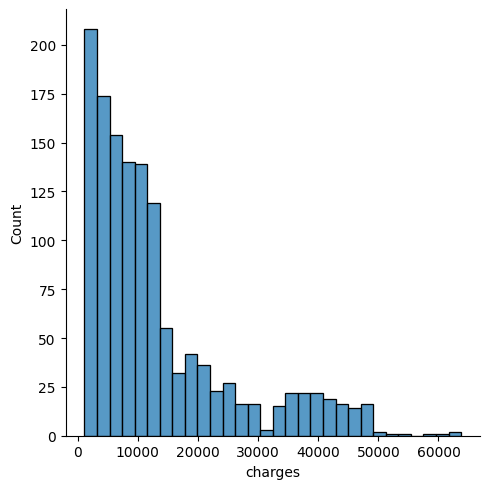

In [8]:
plt.figure(figsize=(12,13))
sns.displot(df['charges'])

<Axes: >

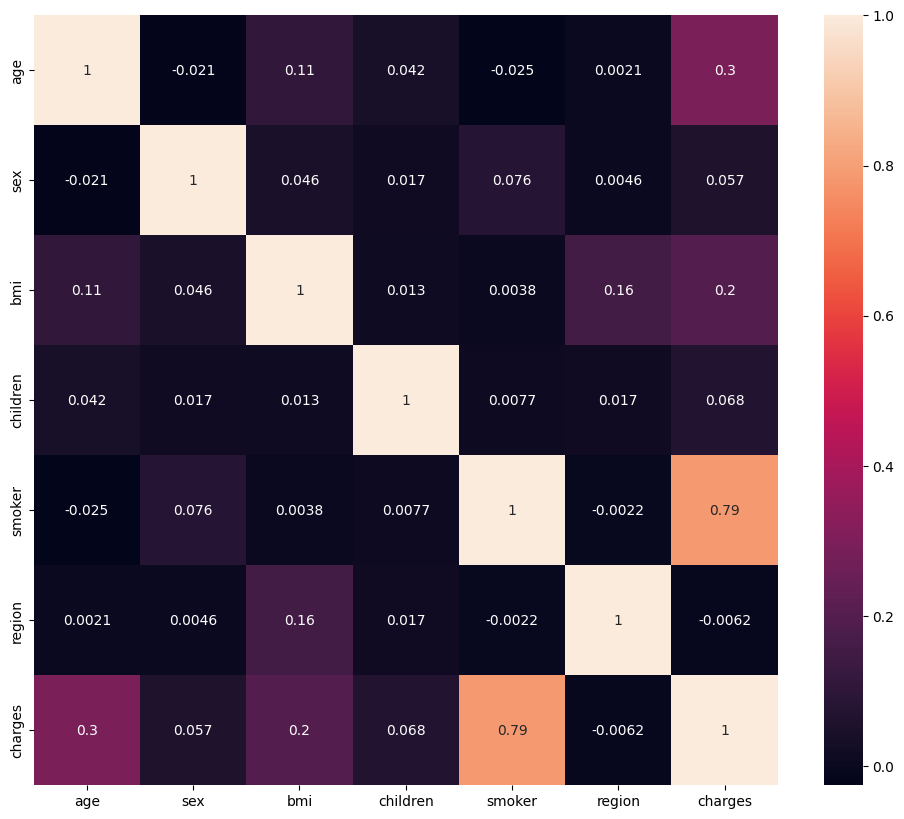

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

# Split x,y

In [10]:
x = df.drop('charges',axis=1)
y = df['charges'].astype(int)

# Train Data

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=78)

In [12]:
xtrain.head()

,age,sex,bmi,children,smoker,region
62,64,1,24.700,1,0,1
861,38,0,28.000,3,0,3
973,19,0,40.500,0,0,3
209,40,1,41.230,1,0,0
849,55,1,32.775,0,0,1


In [13]:
ytrain.head()

62     30166
861     7151
973     1759
209     6610
849    10601
Name: charges, dtype: int32

# Mutlivariable Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [15]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [16]:
ML_pred = reg.predict(xtest)
ML_pred

array([ 3.18191677e+04,  9.94871620e+03,  1.18462559e+04,  1.26864885e+04,
        5.35980659e+03,  1.47283426e+04,  6.66648059e+03,  9.84584275e+03,
        3.14401317e+04,  3.55664350e+04,  7.75975683e+03,  1.01228799e+04,
        3.50224946e+03,  9.82460058e+03,  3.62934364e+04,  5.93237304e+03,
        7.17176152e+03,  3.04480348e+04,  2.93157188e+04,  3.47193091e+04,
        1.53031929e+04,  1.12901406e+04,  4.35552241e+03,  1.73263451e+03,
        9.18987538e+03,  3.11599351e+04,  3.03364420e+04,  2.77573337e+03,
        1.07587653e+04,  2.97244881e+04,  3.34059848e+03,  8.16323889e+03,
        3.34406647e+03,  1.50734482e+04,  3.10413443e+04,  1.05309299e+04,
        3.23610661e+03,  1.17237686e+04,  5.33435986e+02,  1.39344838e+04,
        1.04935475e+02,  8.93742600e+03,  9.70891643e+03,  2.75698178e+04,
        1.35076077e+04,  6.50317552e+03,  7.46739029e+03,  1.38157590e+04,
        2.97481921e+03,  2.54875501e+04,  5.26022340e+03,  3.84100396e+03,
        9.14039010e+03,  

In [17]:
df_pred = pd.DataFrame({'Actual': ytest, 'Prediction': ML_pred, 'Difference': abs(ytest-ML_pred)})
df_pred.head()

,Actual,Prediction,Difference
160,21348,31819.167691,10471.167691
1326,7050,9948.716199,2898.716199
544,10231,11846.255877,1615.255877
624,12129,12686.488466,557.488466
914,5257,5359.806590,102.806590


In [18]:
m = reg.coef_
m

array([  263.71512617,    50.87680175,   335.67932733,   466.52549598,
       24400.17250159,  -425.01162728])

In [19]:
c = reg.intercept_
c

-12161.098589568732

In [20]:
ML_accuracy=reg.score(xtest,ytest)
ML_accuracy

0.7216620500084538

In [21]:
ML_mae = mean_absolute_error(ytest,ML_pred)
ML_mae

4182.648729672589

In [22]:
ML_mse = mean_squared_error(ytest,ML_pred)

In [23]:
ML_mse

36165242.27086386

# KNN Regression

In [24]:
from sklearn.neighbors import KNeighborsRegressor
ne = KNeighborsRegressor(n_neighbors=10)

In [25]:
ne.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [26]:
knn_pred = ne.predict(xtest)
knn_pred

array([11029.6, 19928.3, 19426.2, 17266.8, 11619.8, 13802.8, 13541. ,
       13639.5,  7716.9, 16503.8, 11681. , 16225.5,  5001.1, 14140.1,
       21129.2,  9725. , 11983. , 10342.5,  7879.2,  7987.9, 20495.2,
        9848.5,  7817.4,  5494.4, 19142.8, 11835. ,  9199.5,  5663.6,
       13288.6, 11241.4,  5179.7,  9850.7,  8176. , 23997.3,  8962.6,
       12835.8,  5435. , 18921.4,  5681.5, 11963.7,  6363.1, 18502.7,
       14466.7, 11949.2, 16353.8, 14585.2,  6375.4, 12433.6,  8079.9,
        3523.7, 10018.1,  9047.3, 17306.1, 15467.2,  2969.6, 11387.1,
       13461. ,  7356.9, 15460.3, 15748.2,  9927.5, 15104.6, 12797.6,
        7316.8,  6698.2,  7612.1, 16950.9, 15103.7,  9909.7,  9144.3,
       12011.4, 15628.2,  6557.4, 11275. , 13474.1, 11442. , 18679.1,
        8237.2, 12836.7, 15651.6, 11970.3, 12706.5, 17016.2, 23742.2,
       11756.5, 15524.2, 11840.6,  8891.1, 16035.4, 13374.3, 10165.5,
        7541.1, 18969. ,  6681.1,  8810.8,  5643.5, 24109.8, 10924.5,
       26191.4, 2070

In [27]:
df_pred = pd.DataFrame({'Actual': ytest, 'Prediction': knn_pred, 'Difference': abs(ytest-knn_pred)})
df_pred.head()

,Actual,Prediction,Difference
160,21348,11029.6,10318.4
1326,7050,19928.3,12878.3
544,10231,19426.2,9195.2
624,12129,17266.8,5137.8
914,5257,11619.8,6362.8


In [28]:
knn_accuracy=ne.score(xtest,ytest)
knn_accuracy

0.11002044725265026

In [29]:
kn_mse= mean_squared_error(ytest,knn_pred)
kn_mse

115637577.06126864

In [30]:
kn_mae = mean_absolute_error(ytest,knn_pred)
kn_mae

8052.718159203981

# Dataframe

In [31]:
data = pd.DataFrame({'Models':['Multivariable Linear Regression','KNN Regression'],
       'Accuracy': [ML_accuracy,knn_accuracy],
       'MSE': [ML_mse,kn_mse],
       'MAE': [ML_mae,kn_mae]})

data.head()

,Models,Accuracy,MSE,MAE
0,Multivariable Linear Regression,0.721662,3.616524e+07,4182.648730
1,KNN Regression,0.110020,1.156376e+08,8052.718159


# Barplot

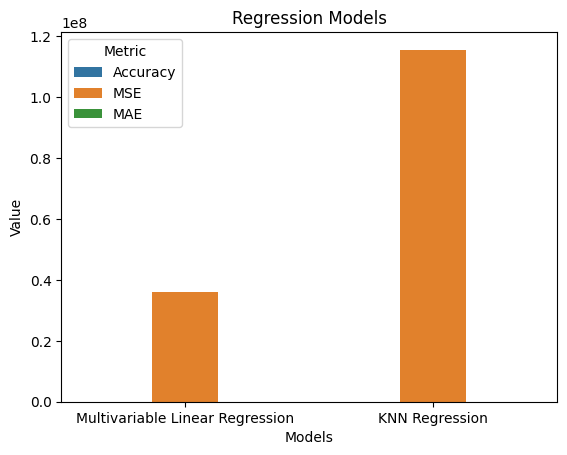

In [32]:
data_bar = data.melt('Models', var_name='Metric', value_name='Value')
sns.barplot(x='Models', y='Value', hue='Metric', data=data_bar)
plt.title('Regression Models')
plt.xlabel('Models')
plt.ylabel('Value')
plt.show()

# Since the value of accuracy and mae is too much short than mse that's why not showing in same barplot. So the comparision should in below one by one barplot

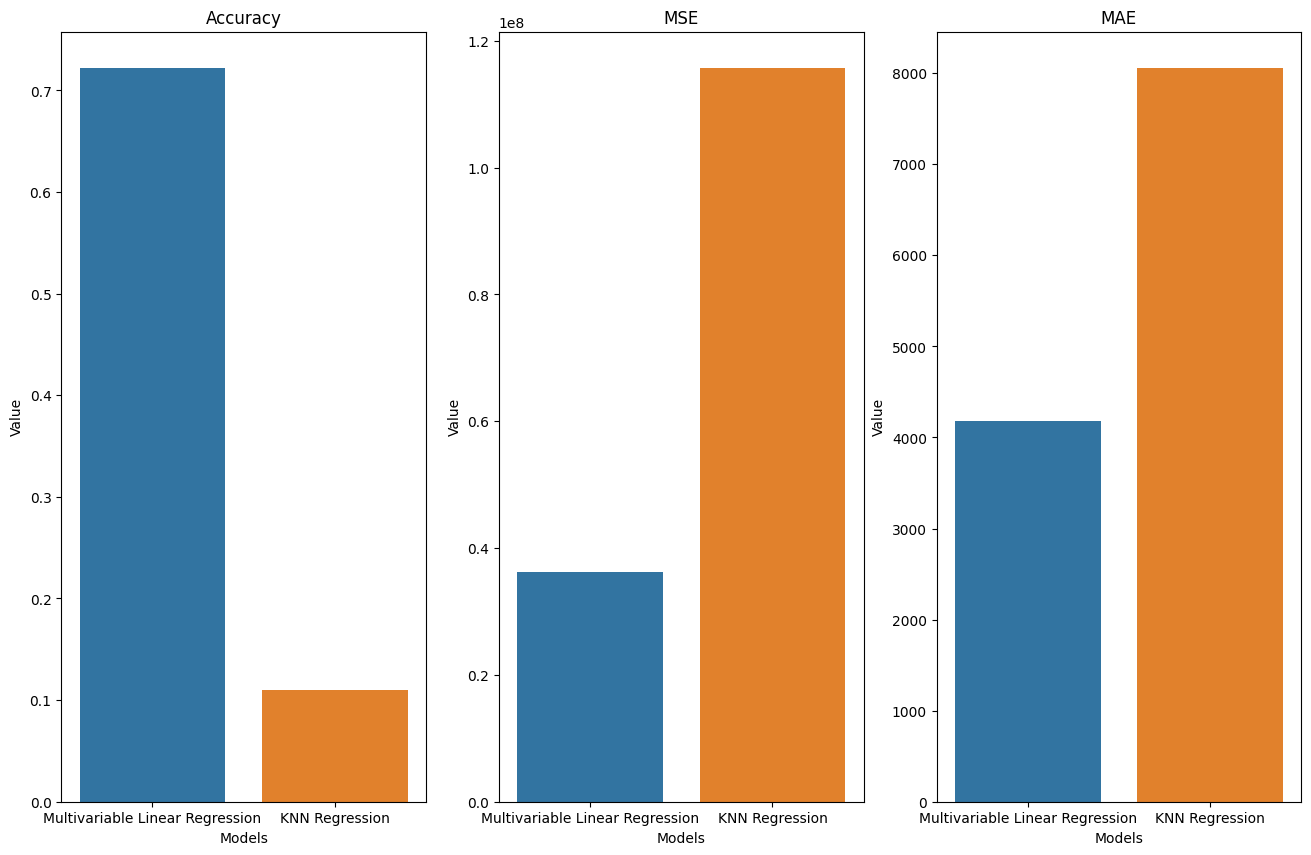

In [42]:
columns = data.columns
plt.figure(figsize=(16,10))

for i in range(1,4):
   plt.subplot(1, 3, i)
   sns.barplot(data=data, x="Models", y=columns[i])
   plt.xlabel("Models")
   plt.ylabel("Value")
   plt.title(columns[i])
plt.show()